# 사전 준비

## 구글 드라이브 마운트

왼쪽에서, Google Drive 아이콘 클릭하여, Google Drive를 마운트 한 후, 다음 코드를 실행

In [1]:
import os
base_gdrive_path = os.path.join("drive", "MyDrive", "강의", "경희대 강의")

# Imports

In [2]:
# TensorFlow and tf.keras
import tensorflow as tf
from tensorflow import keras

# Helper libraries
import numpy as np
import matplotlib.pyplot as plt

print(tf.__version__)

2.5.0


# Fashion MNIST

## 데이터 다운 및 분석

In [3]:
fashion_mnist = keras.datasets.fashion_mnist

(train_images, train_labels), (test_images, test_labels) = fashion_mnist.load_data()

4423680/4422102 [==============================] - 0s 0us/step


In [4]:
print("트레이닝 이미지 shape: {}, dtype: {}".format(train_images.shape, train_images.dtype))
print("트레이닝 라벨 shape: {}, dtype: {}".format(train_labels.shape, train_labels.dtype))

트레이닝 이미지 shape: (60000, 28, 28), dtype: uint8
트레이닝 라벨 shape: (60000,), dtype: uint8


In [5]:
print("테스트 이미지 shape: {}, dtype: {}".format(test_images.shape, test_images.dtype))
print("테스트 라벨 shape: {}, dtype: {}".format(test_labels.shape, test_labels.dtype))

테스트 이미지 shape: (10000, 28, 28), dtype: uint8
테스트 라벨 shape: (10000,), dtype: uint8


In [6]:
class_names = ['T-shirt/top', 'Trouser', 'Pullover', 'Dress', 'Coat',
               'Sandal', 'Shirt', 'Sneaker', 'Bag', 'Ankle boot']

## 데이터 전처리

샘플 데이터 하나 살펴보기

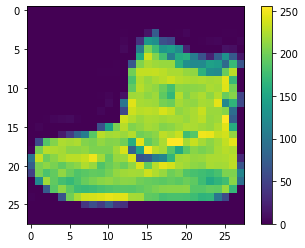

In [7]:
plt.figure()
plt.imshow(train_images[0])
plt.colorbar()
plt.grid(False)
plt.show()

데이터를 비율로 변경. 트레이닝을 더 잘 시키기 위함

In [8]:
train_images = train_images / 255.0
test_images = test_images / 255.0

binary cmap으로 트레이닝 이미지 여러 개 살펴보기

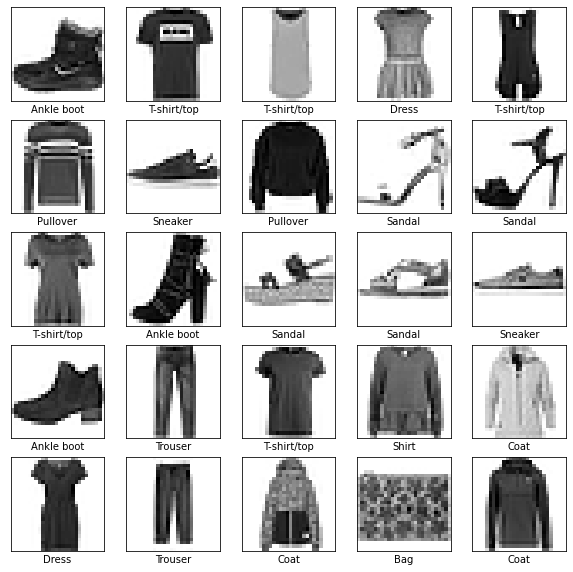

In [9]:
plt.figure(figsize=(10,10))
for i in range(25):
    plt.subplot(5,5,i+1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(train_images[i], cmap=plt.cm.binary)
    plt.xlabel(class_names[train_labels[i]])
plt.show()

## 모델 1

### 모델 1 생성

In [10]:
def fashion_classification_model():
  input = keras.layers.Input((28, 28))
  flatten = keras.layers.Flatten()(input)
  dense_1 = keras.layers.Dense(128, activation=keras.activations.relu)(flatten)
  dense_2 = keras.layers.Dense(10)(dense_1)

  return keras.models.Model(inputs=[input], outputs=[dense_2])

In [11]:
model = fashion_classification_model()
model.summary()

Model: "model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
flatten (Flatten)            (None, 784)               0         
_________________________________________________________________
dense (Dense)                (None, 128)               100480    
_________________________________________________________________
dense_1 (Dense)              (None, 10)                1290      
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 모델 1 트레이닝

In [46]:
model.compile(optimizer=keras.optimizers.Adam(),
              loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
              metrics=[keras.metrics.SparseCategoricalAccuracy()])

# model.compile(optimizer='adam',
#               loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
#               metrics=['accuracy'])

# 'accuracy'로 넣으면, 자동으로 다음 중 하나로 전환해서 측정합니다.
# keras.metrics.BinaryAccuracy, keras.metrics.CategoricalAccuracy, keras.metrics.SparseCategoricalAccuracy

In [47]:
history = model.fit(train_images, train_labels, epochs=10)

Epoch 1/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.3331 - sparse_categorical_accuracy: 0.8909
Epoch 2/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2471 - sparse_categorical_accuracy: 0.9084
Epoch 3/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2333 - sparse_categorical_accuracy: 0.9127
Epoch 4/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2244 - sparse_categorical_accuracy: 0.9161
Epoch 5/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2187 - sparse_categorical_accuracy: 0.9175
Epoch 6/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2090 - sparse_categorical_accuracy: 0.9215
Epoch 7/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.2042 - sparse_categorical_accuracy: 0.9237
Epoch 8/10
1875/1875 [==============================] - 3s 2ms/step - loss: 0.1973 - sparse_categorical_accuracy: 0.9251
Epoch 9/10
1875/1875 [==========

[0.8909333348274231,
 0.9083999991416931,
 0.9126833081245422,
 0.9161166548728943,
 0.9174666404724121,
 0.9215166568756104,
 0.9236666560173035,
 0.9251000285148621,
 0.927383303642273,
 0.9293166399002075]

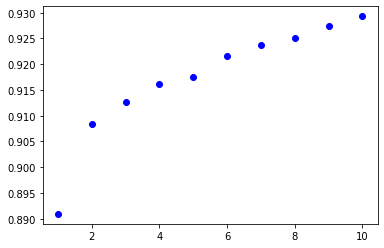

In [48]:
history_accuracy = history.history["sparse_categorical_accuracy"]

epochs = range(1, len(history_accuracy) + 1)
plt.plot(epochs, history_accuracy, "bo", label="Training accuracy")
history_accuracy

[0.33307188749313354,
 0.2470925897359848,
 0.23330271244049072,
 0.22443196177482605,
 0.21866671741008759,
 0.2089531570672989,
 0.20424984395503998,
 0.19733941555023193,
 0.19217993319034576,
 0.18648014962673187]

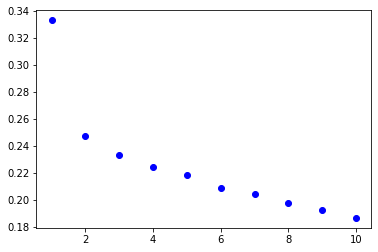

In [49]:
history_loss = history.history["loss"]

epochs = range(1, len(history_loss) + 1)
plt.plot(epochs, history_loss, "bo", label="Training loss")
history_loss

### 모델 1 테스트 및 예측

In [50]:
test_loss, test_acc = model.evaluate(test_images,  test_labels, verbose=2)
print('테스트 정확도:', test_acc)

313/313 - 0s - loss: 0.3534 - sparse_categorical_accuracy: 0.8865
테스트 정확도: 0.8865000009536743


## 모델 2

### 모델 2 생성

In [51]:
def fashion_classification_model_2(pre_trained_fashion_classification_model):
  pre_classification = pre_trained_fashion_classification_model(
      pre_trained_fashion_classification_model.inputs)
  softmax_1 = keras.layers.Softmax()(pre_classification)

  return keras.models.Model(
      inputs=pre_trained_fashion_classification_model.inputs, 
      outputs=[softmax_1])

In [52]:
model2 = fashion_classification_model_2(model)
model2.summary()

Model: "model_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 28, 28)]          0         
_________________________________________________________________
model (Functional)           (None, 10)                101770    
_________________________________________________________________
softmax_2 (Softmax)          (None, 10)                0         
Total params: 101,770
Trainable params: 101,770
Non-trainable params: 0
_________________________________________________________________


### 모델 2 예측

In [53]:
predictions = model2.predict(test_images)

In [54]:
predictions[0]

array([5.1560184e-12, 7.9388922e-14, 1.0622956e-11, 6.5467664e-14,
       5.1416477e-13, 1.7946502e-07, 1.1961515e-11, 2.7448868e-03,
       1.6543965e-12, 9.9725491e-01], dtype=float32)

In [40]:
np.argmax(predictions[0])

6

In [41]:
test_labels[0]

9

### 모델 2 예측 그리기

In [42]:
def plot_image(i, predictions_array, true_label, img):
  true_label, img = true_label[i], img[i]
  plt.grid(False)
  plt.xticks([])
  plt.yticks([])

  plt.imshow(img, cmap=plt.cm.binary)

  predicted_label = np.argmax(predictions_array)
  if predicted_label == true_label:
    color = 'blue'
  else:
    color = 'red'

  plt.xlabel("{} {:2.0f}% ({})".format(class_names[predicted_label],
                                100*np.max(predictions_array),
                                class_names[true_label]),
                                color=color)

def plot_value_array(i, predictions_array, true_label):
  true_label = true_label[i]
  plt.grid(False)
  plt.xticks(range(10))
  plt.yticks([])
  thisplot = plt.bar(range(10), predictions_array, color="#777777")
  plt.ylim([0, 1])
  predicted_label = np.argmax(predictions_array)

  thisplot[predicted_label].set_color('red')
  thisplot[true_label].set_color('blue')

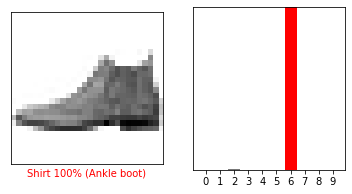

In [43]:
i = 0
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i], test_labels)
plt.show()

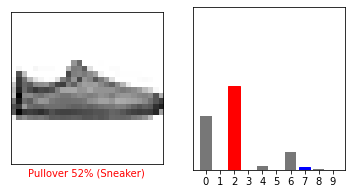

In [44]:
i = 12
plt.figure(figsize=(6,3))
plt.subplot(1,2,1)
plot_image(i, predictions[i], test_labels, test_images)
plt.subplot(1,2,2)
plot_value_array(i, predictions[i],  test_labels)
plt.show()

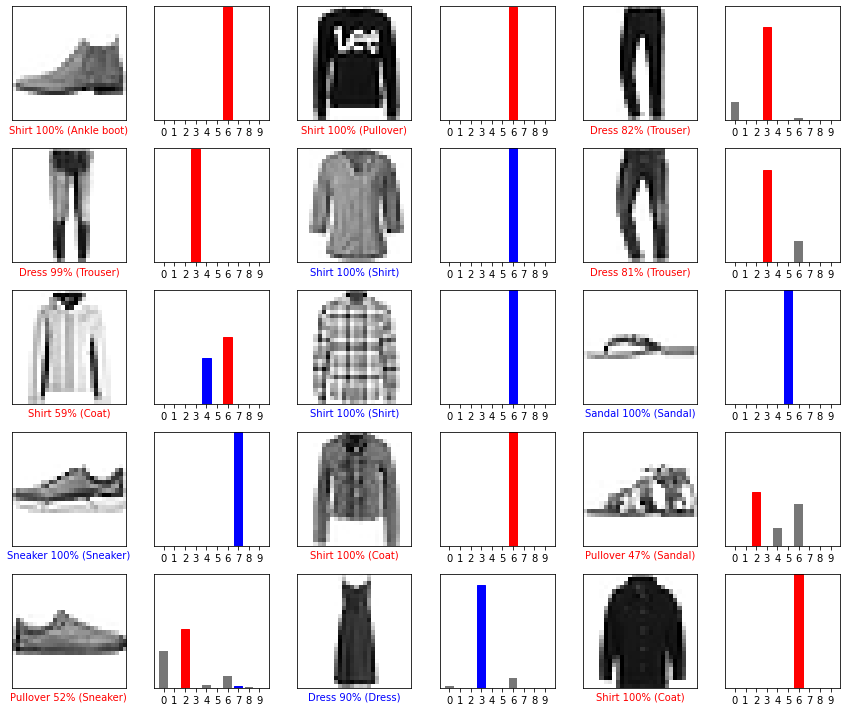

In [45]:
# Plot the first X test images, their predicted labels, and the true labels.
# Color correct predictions in blue and incorrect predictions in red.
num_rows = 5
num_cols = 3
num_images = num_rows*num_cols
plt.figure(figsize=(2*2*num_cols, 2*num_rows))
for i in range(num_images):
  plt.subplot(num_rows, 2*num_cols, 2*i+1)
  plot_image(i, predictions[i], test_labels, test_images)
  plt.subplot(num_rows, 2*num_cols, 2*i+2)
  plot_value_array(i, predictions[i], test_labels)
plt.tight_layout()
plt.show()

# 모델 저장, 가중치 저장 및 불러오기

In [ ]:
def save_model(model_name: str, model: keras.models.Model):
    model_json = model.to_json()
    with open(model_name, "w") as json_file:
        json_file.write(model_json)

In [ ]:
from keras.models import model_from_json
from typing import Optional

def load_model(model_name: str, with_weights_path: Optional[str] = None) -> keras.models.Model:
    json_file = open(model_name, "r")
    loaded_model_json = json_file.read()
    json_file.close()
    model = model_from_json(loaded_model_json)
    if with_weights_path:
        model.load_weights(with_weights_path)
    return model

In [ ]:
import os
result_path = os.path.join(base_gdrive_path, "results")

In [ ]:
save_model(os.path.join(result_path, "model2_000.json"), model2)

In [ ]:
import time
run_id: str = time.strftime("%Y%m%d-%H%M%S")

model2.save_weights(os.path.join(result_path, "model2_000__{}.hdf5".format(run_id)))

In [ ]:
loaded_model2 = load_model(os.path.join(result_path, "model2_000.json"))
prediction_loaded_model2 = loaded_model2.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model2[0])))
print(prediction_loaded_model2[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[1.42383627e-07 7.01708136e-11 1.07785615e-06 1.13681836e-07
 3.31371240e-07 8.44417512e-03 4.06497929e-06 1.10350479e-03
 7.47477245e-08 9.90446448e-01]
불러온 모델의 예측: 4
[0.12938051 0.08859454 0.05948805 0.10890587 0.2170323  0.09194062
 0.09769601 0.08493329 0.03258757 0.08944127]
정답 :9


In [ ]:
json_model_path = os.path.join(result_path, "model2_000.json")
model_weight_path = os.path.join(result_path, "model2_000__20210701-052007.hdf5")
loaded_model2_with_weight = load_model(json_model_path, model_weight_path)
prediction_loaded_model2_with_weight = loaded_model2_with_weight.predict(test_images)

print("트레이닝한 모델의 예측: {}".format(np.argmax(predictions[0])))
print(predictions[0])
print("가중치와 함께 불러온 모델의 예측: {}".format(np.argmax(prediction_loaded_model2_with_weight[0])))
print(prediction_loaded_model2_with_weight[0])
print("정답 :{}".format(test_labels[0]))

트레이닝한 모델의 예측: 9
[1.42383627e-07 7.01708136e-11 1.07785615e-06 1.13681836e-07
 3.31371240e-07 8.44417512e-03 4.06497929e-06 1.10350479e-03
 7.47477245e-08 9.90446448e-01]
가중치와 함께 불러온 모델의 예측: 9
[1.42383627e-07 7.01708136e-11 1.07785615e-06 1.13681836e-07
 3.31371240e-07 8.44417512e-03 4.06497929e-06 1.10350479e-03
 7.47477245e-08 9.90446448e-01]
정답 :9
